In [1]:
# import libraries
import pandas as pd
import numpy as np
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from kneed import KneeLocator
import prince
from sklearn.preprocessing import StandardScaler

In [2]:
# read the csv
df = pd.read_csv('new_3.csv')
print(df.columns)
df

Index(['Unnamed: 0', 'Entity', 'Code', 'Date', 'school_closures',
       'international_travel_controls', 'restriction_gatherings',
       'cancel_public_events', 'public_information_campaigns',
       'restrictions_internal_movements', 'income_support', 'facial_coverings',
       'vaccination_policy', 'testing_policy', 'contact_tracing',
       'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million',
       'new_vaccinations_smoothed_per_million', 'population',
       'population_density', 'median_age', 'aged_65_older', 'gdp_per_capita',
       'cardiovasc_death_rate', 'diabetes_prevalence',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'international_travel_controls_binary',
       'probability_open'],
      dtype='object')


,Unnamed: 0,Entity,Code,Date,school_closures,international_travel_controls,restriction_gatherings,cancel_public_events,public_information_campaigns,restrictions_internal_movements,...,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,international_travel_controls_binary,probability_open
0,0,Afghanistan,AFG,1/6/2020,3,3,4,2,2,2,...,18.6,2.581,1803.987,597.029,9.59,0.5,64.83,0.511,0,0.923077
1,1,Afghanistan,AFG,8/6/2020,3,3,4,2,2,2,...,18.6,2.581,1803.987,597.029,9.59,0.5,64.83,0.511,0,1.000000
2,2,Afghanistan,AFG,15/6/2020,3,1,4,2,2,2,...,18.6,2.581,1803.987,597.029,9.59,0.5,64.83,0.511,1,1.000000
3,3,Afghanistan,AFG,22/6/2020,3,1,4,2,2,2,...,18.6,2.581,1803.987,597.029,9.59,0.5,64.83,0.511,1,1.000000
4,4,Afghanistan,AFG,29/6/2020,3,1,4,2,2,2,...,18.6,2.581,1803.987,597.029,9.59,0.5,64.83,0.511,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8399,8399,Zimbabwe,ZWE,7/6/2021,0,1,3,2,2,0,...,19.6,2.822,1899.775,307.846,1.82,1.7,61.49,0.571,1,NaN
8400,8400,Zimbabwe,ZWE,14/6/2021,0,2,3,2,2,2,...,19.6,2.822,1899.775,307.846,1.82,1.7,61.49,0.571,1,NaN
8401,8401,Zimbabwe,ZWE,21/6/2021,0,2,3,2,2,2,...,19.6,2.822,1899.775,307.846,1.82,1.7,61.49,0.571,1,NaN
8402,8402,Zimbabwe,ZWE,28/6/2021,0,2,4,2,2,2,...,19.6,2.822,1899.775,307.846,1.82,1.7,61.49,0.571,1,NaN


In [3]:
# remove columns not related to Factor Analysis
FA_df = df.drop(['Unnamed: 0','Entity','Code','Date', 'international_travel_controls_binary', 'probability_open'],axis=1)

columns_to_change = FA_df.columns[0:11]
for col in columns_to_change:
    FA_df[col] = FA_df[col].astype(str)

print(len(FA_df.columns))
FA_df.dtypes

24


school_closures                           object
international_travel_controls             object
restriction_gatherings                    object
cancel_public_events                      object
public_information_campaigns              object
restrictions_internal_movements           object
income_support                            object
facial_coverings                          object
vaccination_policy                        object
testing_policy                            object
contact_tracing                           object
new_cases_smoothed_per_million           float64
new_deaths_smoothed_per_million          float64
new_vaccinations_smoothed_per_million      int64
population                                 int64
population_density                       float64
median_age                               float64
aged_65_older                            float64
gdp_per_capita                           float64
cardiovasc_death_rate                    float64
diabetes_prevalence 

In [4]:
N=30
famd = prince.FAMD(n_components=N, n_iter=50, copy=True, check_input=True, engine='auto', random_state=42)
famd = famd.fit(FA_df)

In [5]:
# Display Eigenvalues and Explained Inertia (Analogous to variation)
print("Eigenvalues:")
print(famd.eigenvalues_)
print()
print("Explained inertia:")
print(famd.explained_inertia_)

Eigenvalues:
[1.52085170e-04 7.44788111e-05 4.66972851e-05 4.50123210e-05
 4.11855641e-05 3.31689307e-05 3.24692046e-05 3.01215204e-05
 2.93653633e-05 2.87758870e-05 2.75092439e-05 2.67915499e-05
 2.45135543e-05 2.38658133e-05 2.36070090e-05 2.27873114e-05
 2.20696392e-05 2.18691631e-05 2.14971664e-05 2.12726281e-05
 2.07944823e-05 2.06029886e-05 2.00126634e-05 1.89857881e-05
 1.87545099e-05 1.79685574e-05 1.76517860e-05 1.70224116e-05
 1.65970835e-05 1.62399916e-05]

Explained inertia:
[0.14060709 0.06885779 0.04317298 0.04161518 0.03807723 0.03066562
 0.03001871 0.02784821 0.02714912 0.02660413 0.02543308 0.02476955
 0.02266348 0.02206463 0.02182535 0.02106752 0.02040401 0.02021867
 0.01987474 0.01966715 0.01922509 0.01904805 0.01850228 0.0175529
 0.01733908 0.01661244 0.01631958 0.01573771 0.01534448 0.01501434]


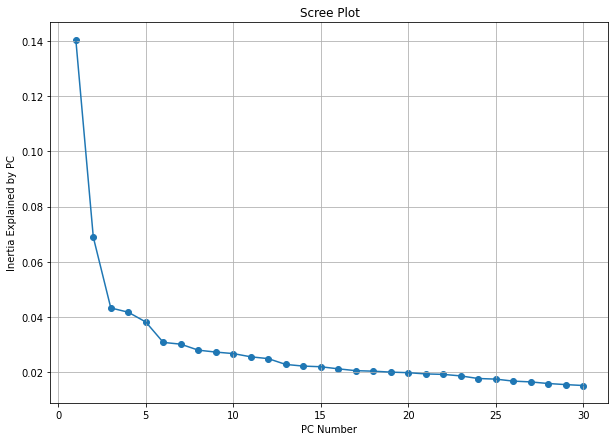

In [6]:
#Scree Plot 
plt.figure(figsize=(10, 7)) 
plt.scatter(range(1,N+1),famd.explained_inertia_)
plt.plot(range(1,N+1),famd.explained_inertia_)
plt.title('Scree Plot')
plt.xlabel('PC Number')
plt.ylabel('Inertia Explained by PC')
plt.grid()

In [7]:
# finding the knee
kl = KneeLocator(range(1, N+1), famd.explained_inertia_, curve="convex", direction="decreasing")

print('elbow at:', kl.elbow)
print('sum of inertia:', sum(famd.explained_inertia_[:kl.elbow]))

elbow at: 6
sum of inertia: 0.3629958860392396


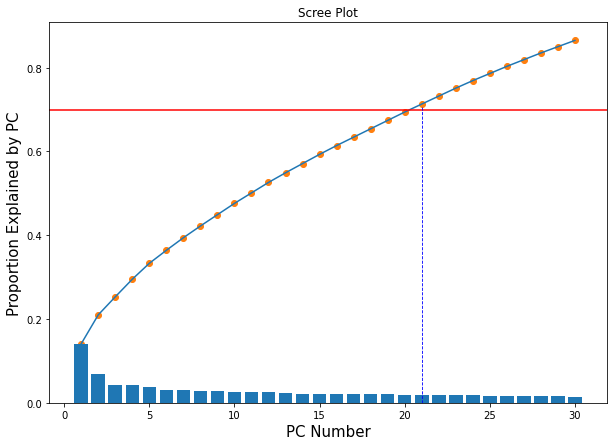

In [8]:
# plot scree plot against PC number
cumulative_variance = np.cumsum(np.round(famd.explained_inertia_, decimals=3))

x = list(range(1,N+1))
plt.figure(figsize=(10, 7)) 
plt.bar(x,famd.explained_inertia_)
plt.scatter(range(1,N+1),cumulative_variance)
plt.plot(x,cumulative_variance)
plt.title('Scree Plot')
plt.xlabel('PC Number', fontsize=15)
plt.ylabel('Proportion Explained by PC', fontsize=15)
plt.axhline(y=0.7, color = 'r')
plt.axvline(x=21, color = 'b', ymax=0.78, linestyle='--', linewidth=0.85)
plt.savefig('scree.png', dpi=1000)